In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [227]:
df = pd.read_csv('summary_data.csv')
df.head()

,flight_id,air_temperature,battery_serial_number,body_serial_number,commit,launch_airspeed,launch_groundspeed,launch_timestamp,preflight_voltage,rel_humidity,static_pressure,wind_direction,wind_magnitude,wing_serial_number
0,16951,20.550000,15SPJJJ09036021,577350132807348254,5c504d9a16,32.453445,30.164656,2018-09-06 07:43:59 CAT,NaN,74.150000,80662.081736,-49.434555,1.949338,15SPJJJ11024054
1,16952,20.500000,15SPJJJ10029029,577209618523054122,5c504d9a16,32.141209,30.535246,2018-09-06 07:51:49 CAT,NaN,71.175044,80708.065314,-4.408768,0.917357,15SPJJJ09011032
2,16954,24.475019,15SPJJJ10012034,577209618523054122,5c504d9a16,34.701878,29.872613,2018-09-06 09:56:37 CAT,NaN,66.374982,80774.270438,-23.458781,3.788383,15SPJJJ09011032
3,16955,27.300000,15SPJJJ10054027,577209618523082792,5c504d9a16,34.368999,29.877624,2018-09-06 10:27:04 CAT,NaN,59.000000,80805.138793,-46.747881,3.921605,15SPJJJ11049056
4,16957,26.950000,15SPJJJ10050049,577348835962150933,5c504d9a16,32.898979,30.027183,2018-09-06 11:09:39 CAT,NaN,63.900000,80768.969307,-29.293360,2.975881,15SPJJJ09031032


## 1. Scatter plot

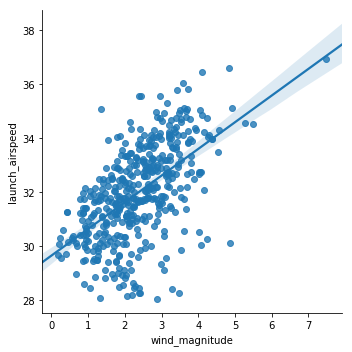

In [247]:


sbn.lmplot(x = 'wind_magnitude',y = 'launch_airspeed', data = df)

## 2. Boxplot

Text(0.5, 1.0, 'Air temperature')

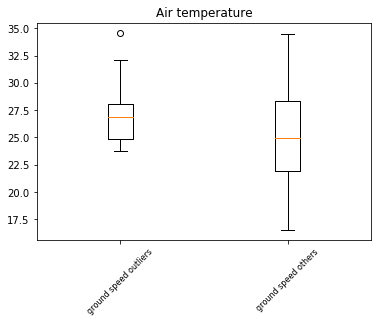

In [251]:
ax = plt.subplot()
ax.boxplot([df_outliers.air_temperature,df_not_outliers.air_temperature])
ax.set_xticklabels(['ground speed outliers','ground speed others'],
                    rotation=45, fontsize=8)
plt.title('Air temperature')
#plt.boxplot()

## 3. Polar plot(scatter plot)

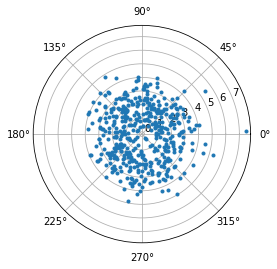

In [253]:
plt.polar(df.wind_direction, df.wind_magnitude,'.')

## 4. Distribution plot(bar plot)

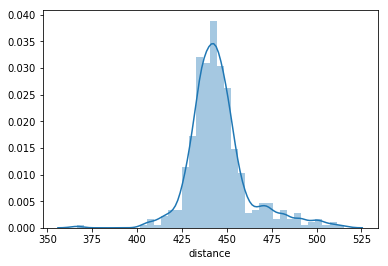

In [263]:
sbn.distplot(df['distance'])

## 5. Lineplot

In [3]:
ByCycle_Summary_table = pd.read_csv('ByCycle_Summary_table.csv')

Text(0.5, 1.0, 'Efficiency vs. Cycle')

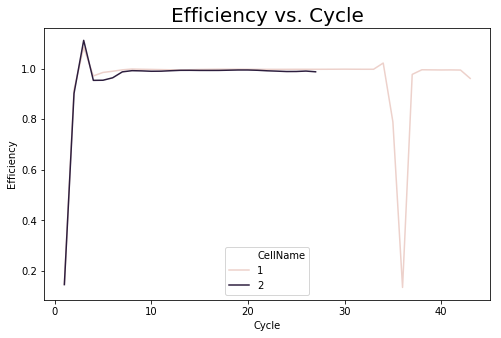

In [9]:
fig, ax = plt.subplots(figsize=(8,5))
ax = fig.gca()
sns.lineplot(x='Cycle',y='Efficiency',hue='CellName',data=ByCycle_Summary_table,legend='full')
ax.set_title('Efficiency vs. Cycle', size=20)

## 6. Stacked plot 

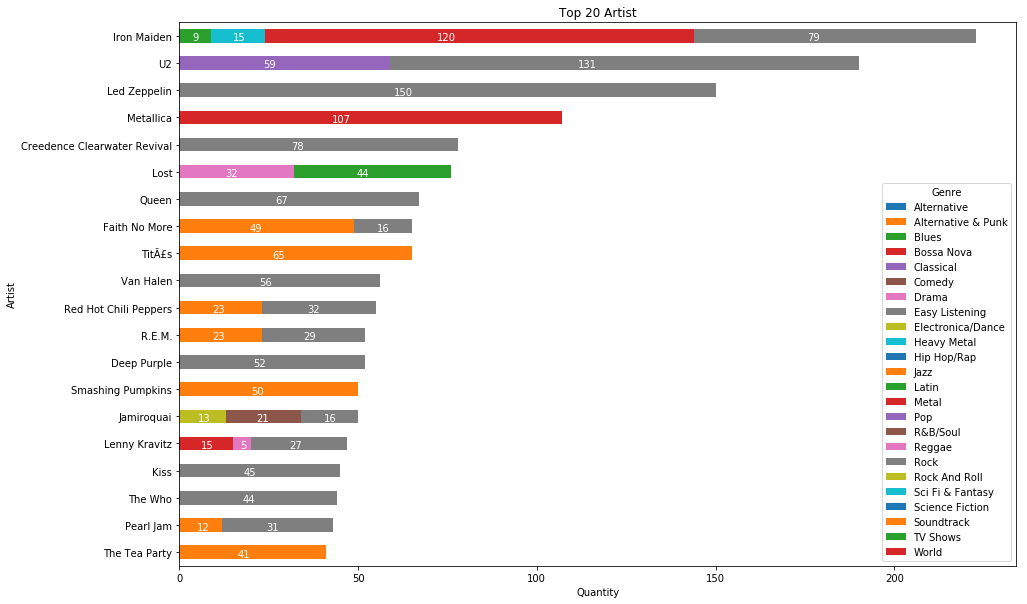

In [11]:
df = pd.read_csv('Music Sales.csv', index_col=None)
df_EA=df[df['Region'].isin(['Europe', 'Asia'])].copy()
from pandas import pivot_table

df_EA['counts']=0
sales_artist = df_EA.groupby(['Artist','Genre','Quantity'], as_index=False)['counts'].count().sort_values(by='counts', ascending = False)
sales_artist['total']=sales_artist['Quantity']*sales_artist['counts'] 
sales_artist.drop(['Quantity','counts'],axis=1,inplace=True)
sales_artist_pivot = pivot_table(sales_artist, values='total', index=['Artist'],columns=['Genre'], aggfunc=np.sum)

sales_artist_pivot['sum'] = sales_artist_pivot.sum(axis = 1)
sales_artist_pivot
# only keep the top 20 artists by the sum
sales_artist_pivot = sales_artist_pivot.sort_values(by = 'sum', ascending = False).iloc[0:20,:-1]

# plot the figure 
#sales_artist_pivot[::-1].plot(kind='barh', stacked=True  )

ax20=sales_artist_pivot[::-1].plot(kind='barh', stacked=True,figsize=(15, 10)  )
plt.xlabel('Quantity')
plt.title('Top 20 Artist')
for p in ax20.patches:
    width, height = p.get_width(), p.get_height()
    if width > 0:
        ax20.annotate(f'{width:.0f}', (p.get_x()+0.40*width,
                                     p.get_y()+.17*height), color='white', fontsize=10)

## 7.Violin plot

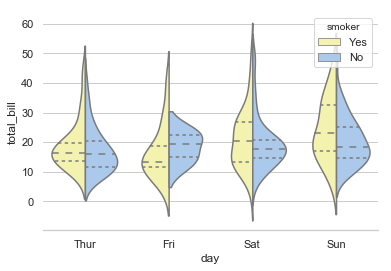

In [12]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="day", y="total_bill", hue="smoker",
               split=True, inner="quart",
               palette={"Yes": "y", "No": "b"},
               data=tips)
sns.despine(left=True)

## 8.Heatmap

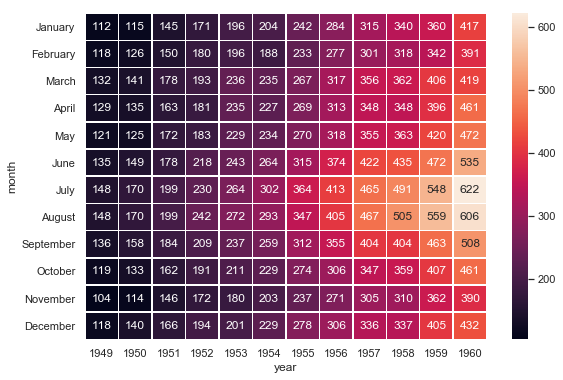

In [13]:
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

## 9. Pair Grid

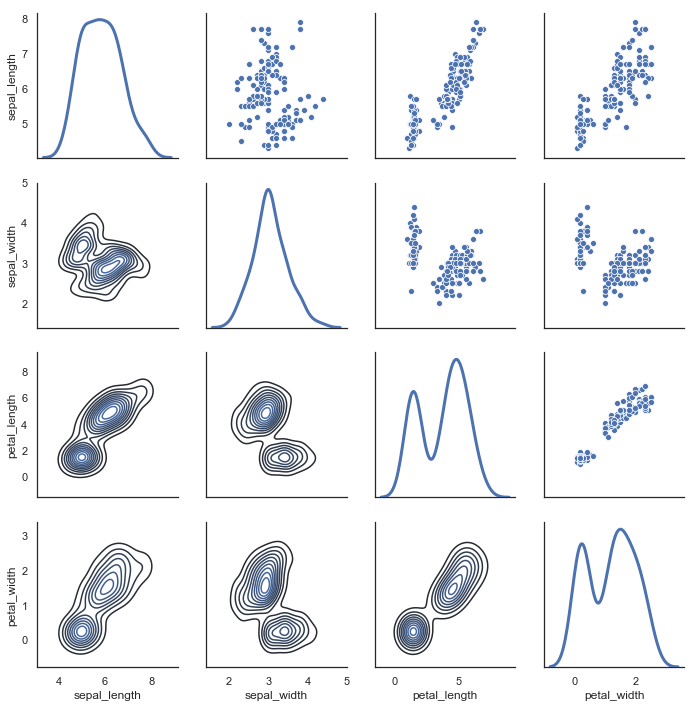

In [14]:
sns.set(style="white")

df = sns.load_dataset("iris")

g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)

## 10. Pie chart

Saving 'svg_filter_pie.svg'


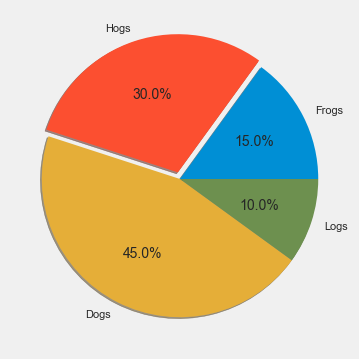

In [16]:
from matplotlib.patches import Shadow

# make a square figure and axes
fig1 = plt.figure(1, figsize=(6, 6))
ax = fig1.add_axes([0.1, 0.1, 0.8, 0.8])

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
fracs = [15, 30, 45, 10]

explode = (0, 0.05, 0, 0)

# We want to draw the shadow for each pie but we will not use "shadow"
# option as it does'n save the references to the shadow patches.
pies = ax.pie(fracs, explode=explode, labels=labels, autopct='%1.1f%%')

for w in pies[0]:
    # set the id with the label.
    w.set_gid(w.get_label())

    # we don't want to draw the edge of the pie
    w.set_ec("none")

for w in pies[0]:
    # create shadow patch
    s = Shadow(w, -0.01, -0.01)
    s.set_gid(w.get_gid() + "_shadow")
    s.set_zorder(w.get_zorder() - 0.1)
    ax.add_patch(s)


# save
from io import BytesIO
f = BytesIO()
plt.savefig(f, format="svg")

import xml.etree.cElementTree as ET


tree, xmlid = ET.XMLID(f.getvalue())

# insert the filter definition in the svg dom tree.
tree.insert(0, ET.XML(filter_def))

for i, pie_name in enumerate(labels):
    pie = xmlid[pie_name]
    pie.set("filter", 'url(#MyFilter)')

    shadow = xmlid[pie_name + "_shadow"]
    shadow.set("filter", 'url(#dropshadow)')

fn = "svg_filter_pie.svg"
print("Saving '%s'" % fn)
ET.ElementTree(tree).write(fn)